In [71]:
# Script page for ASTRO 400B Project
# Currently no comments still testing and writing and thinking
# Tyler Baines
# Spring 2018

In [18]:
# Import Modules
import numpy as np
import astropy.units as u
import astropy.table as tbl
import matplotlib.pyplot as plt

%matplotlib inline
# Import my Modules
from Readfile import Read
#from GalaxyMass import ComponentMass
from FindFiles import FileFinder
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

In [124]:
Times = np.array([0.0, 4.79, 6.07, 10.3])
MW_files = FileFinder("MW", Times) 
M31_files = FileFinder("M31", Times)

Bulge_index = 3

print ("%s\n%s" % (MW_files, M31_files))


['MW_000', 'MW_335', 'MW_425', 'MW_721']
['M31_000', 'M31_335', 'M31_425', 'M31_721']


In [125]:
Snaps = np.array([0,335,425,721])    

In [118]:
def Data_File(Galaxy, Snap, ptype, variable_type, r_grid_n = 50,):
    
    r_grid = np.geomspace(0.01,30, r_grid_n, endpoint=True)
    Mass_Profile = MassProfile(Galaxy, Snap)
    
    if variable_type == "M":
        Mass_Bulge_grid = Mass_Profile.MassEnclosed(ptype, r_grid)
        File = np.concatenate((r_grid, Mass_Bulge_grid), axis = 0).reshape(2,len(R_array)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_MassProfile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")
    elif variable_type == "V":
        Velocity_Bulge_grid = Mass_Profile.CircularVelocity(ptype, r_grid)
        File = np.concatenate((r_grid, Velocity_Bulge_grid), axis = 0).reshape(2, len(R_array)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_Velocity_Profile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")
    elif variable_type == "D":
        Mass_Bulge_grid = Mass_Profile.MassEnclosed(ptype, r_grid)
        Density_Bulge_grid = 3*MW_Mass_Bulge/(4*np.pi*R_array**3)
        File = np.concatenate((r_grid, Density_Bulge_grid), axis = 0).reshape(2,len(R_array)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_DensityProfile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")        
    
    
    

#Make Data Files
for ii in range(len(Snaps)):
    print (Snaps[ii])
    Data_File("MW", Snaps[ii], Bulge_index, "M")
    Data_File("MW", Snaps[ii], Bulge_index, "V")
    Data_File("M31", Snaps[ii],Bulge_index, "M")
    Data_File("M31", Snaps[ii],Bulge_index, "V")

In [162]:
#lOAD AND PLOT DATA FILES
Data_files_Mass_MW = ["MW_0_MassProfile.dat", "MW_335_MassProfile.dat", "MW_425_MassProfile.dat", "MW_721_MassProfile.dat"]
Data_files_Velocity_MW = ["MW_0_Velocity_Profile.dat", "MW_335_Velocity_Profile.dat", "MW_425_Velocity_Profile.dat", "MW_721_Velocity_Profile.dat"]
Data_files_Mass_M31 = ["M31_0_MassProfile.dat", "M31_335_MassProfile.dat", "M31_425_MassProfile.dat", "M31_721_MassProfile.dat"]
Data_files_Velocity_M31 = ["M31_0_Velocity_Profile.dat", "M31_335_Velocity_Profile.dat", "M31_425_Velocity_Profile.dat", "M31_721_Velocity_Profile.dat"]
colors = ['black', 'red', 'blue', 'gold']
ls = ['-', '--', '-.', ':']

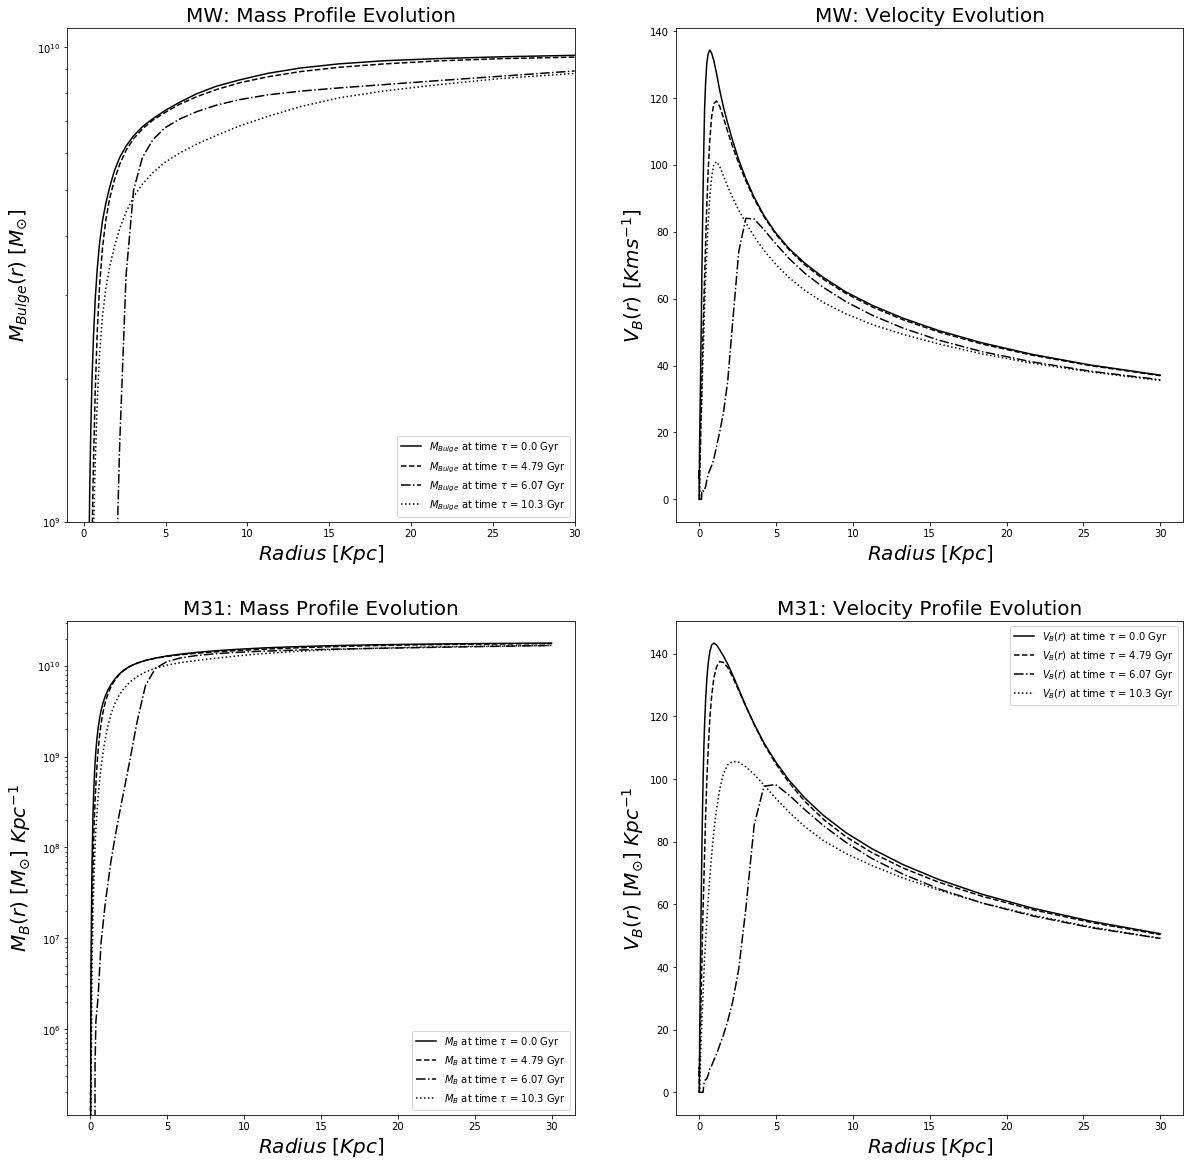

In [174]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace = 0.2)



plt.subplot(2,2,1)
plt.axis([-1, 30, 1e9, 1.1e10])
plt.title("MW: Mass Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{Bulge}(r)$ $[M_{\odot}]$", fontsize = 20)
for file in range(len(Data_files_Mass_MW)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Mass_MW[file], comments="#")
    
    #Plot data
    plt.semilogy(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$M_{Bulge}$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    
plt.subplot(2,2,2)
plt.title("MW: Velocity Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$V_{B}(r)$ $[Kms^{-1}]$", fontsize = 20)
for file in range(len(Data_files_Velocity_MW)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Velocity_MW[file], comments="#")
    plt.plot(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$M_{B}$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend
    
plt.subplot(2,2,3)
plt.title("M31: Mass Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{B}(r)$ $[M_{\odot}]$ $Kpc^{-1}$", fontsize = 20)
for file in range(len(Data_files_Mass_M31)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Mass_M31[file], comments="#")

    
    #Plot data
    plt.semilogy(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$M_{B}$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    

plt.subplot(2,2,4)
plt.title("M31: Velocity Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$V_{B}(r)$ $[M_{\odot}]$ $Kpc^{-1}$", fontsize = 20)
for file in range(len(Data_files_Velocity_M31)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Velocity_M31[file], comments="#")

    
    #Plot data
    plt.plot(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$V_{B}(r)$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    

(100,)


(array([21.,  3.,  5.,  4.,  4.,  3.,  1.,  5.,  3.,  6.,  4.,  4.,  5.,
         3.,  4.,  4.,  3.,  5.,  5.,  8.]),
 array([  0.        ,   5.2802962 ,  10.56059239,  15.84088859,
         21.12118479,  26.40148098,  31.68177718,  36.96207338,
         42.24236957,  47.52266577,  52.80296197,  58.08325816,
         63.36355436,  68.64385056,  73.92414675,  79.20444295,
         84.48473915,  89.76503534,  95.04533154, 100.32562774,
        105.60592393]),
 <a list of 20 Patch objects>)

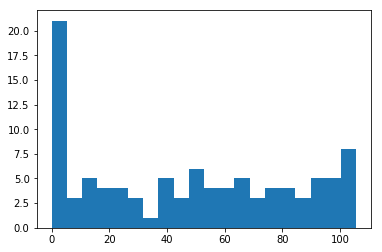

In [173]:
# Make merger file
MW_merger = np.genfromtxt("MW_721_Velocity_Profile.dat", comments="#")
M31_merger = np.genfromtxt("M31_721_Velocity_Profile.dat", comments="#")
Velocity_Merger = np.concatenate((MW_merger[:,1], M31_merger[:,1]), axis = 0)
print (Velocity_Merger.shape)

plt.hist(Velocity_Merger, bins = 20)

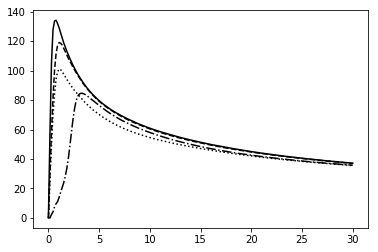

In [36]:
for i in range(len(Snaps)):
    MW = MassProfile("MW", Snaps[i])
    MW_Velocity_Bulge = MW.CircularVelocity(Bulge_index, R_array)

    plt.plot(R_array, MW_Velocity_Bulge, color = 'black', ls = ls[i], \
                label = "$M_{Bulge}$ at time $\\tau$ = " + str(Snaps[i])+" Gyr")

In [82]:
MW = MassProfile("MW", Snaps[2])
MW_Mass_Bulge = MW.MassEnclosed(Bulge_index, R_array)

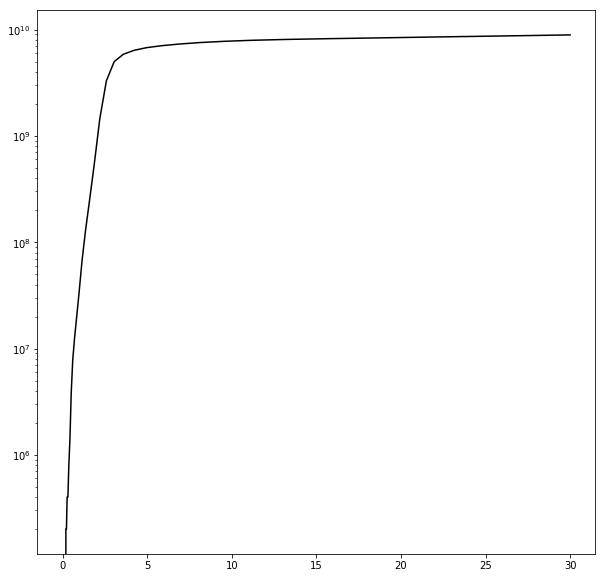

In [84]:
#print (MW_Mass_Bulge)
#print (R_array)
File = np.concatenate((R_array, MW_Mass_Bulge), axis = 0).reshape(2,len(R_array)).T

plt.figure(figsize=(10,10))
plt.semilogy(File[:,0], File[:,1], 'k')
#print (File)

    

In [37]:
for jj in range(len(Snaps)):
    MW = MassProfile("MW", Snaps[i])
    MW_Mass_Bulge = MW.MassEnclosed(Bulge_index, R_array)
    File = np.concatenate(R_array, MW_Mass_Bulge, axis = 0)
    np.savetxt("MW_"+ str(Snaps[i]), File)

TypeError: Argument given by name ('axis') and position (2)

In [62]:
# Determine Re: The Half Mass Radius
def HalfMassRadius(Bmass,R,tot):
    # input, Bulge mass profile, Radius, Total Mass of Bulge
    # returns: Radius where mass is half the total mass 
  
    # half the total mass in units of 1e10
    HalfMass= tot/2.0/1e10
    
    # find where mass profile yields half the total mass 
    # note the use of "np.logical_and"   
    index = np.where( np.logical_and(Bmass/1e10 < (HalfMass+0.1), Bmass/1e10 > (HalfMass-0.1)))
 
    return R[index]

def Sersic_Model(Re,r,n,ML,Mtot,C):

    # luminosity
    L = Mtot/ML
    # Ie = L/7.2/pi/Re**2
    Ie = L/7.2/np.pi/Re**2
        
    return Ie*np.exp(-7.67*((r/Re)**(1.0/n)-C))

In [63]:
# For sersic Profile

#Determine Half Mass Radius for Bulge 
#Re = HalfMassRadius(BulgeMass['Bulge'],BulgeMass['R'],Btot)
#print(Re)



In [72]:
A = "M31_000"
print (A[:-4])

M31


In [71]:
filename = "MW_000"
path = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\\"+filename+".txt"
if filename[:-4] == "MW":
    print (path)

C:\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\MW_000.txt
